In [1]:
# Import libraries
import numpy as np 
import pandas as pd
from scipy import stats

In [2]:
# Step 1: Importing the data

data = pd.read_csv("titanicPassengers.csv",sep=";")


### Aperçu du data frame

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Step 2: Exploring the data

# Get a quick overview of the data
print(data.head())

   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  


In [5]:
# afficher les 5 dernières lignes
display(data.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [6]:
#suppression des variables initules
data1=data.drop(['PassengerId',  'Name',   'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)

### Caractéristiques globales du data frame

In [7]:
# Combien de lignes comportent un data frame ? Et combien de colonnes ?
dim = data1.shape
print ("Le dataset compte {} lignes et {} variables".format(dim[0], dim[1]))
#print(dim[0]) # 
#print(dim[1]) # 

Le dataset compte 891 lignes et 4 variables


In [16]:
#connaître les types de chacune de nos variables
data1.dtypes

Survived     object
Pclass        int64
Sex          object
Age         float64
dtype: object

In [17]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB
None


In [18]:
# pourcentage de valeurs manquante
(data1.isnull().sum() / data1.shape[0])*100

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
dtype: float64

In [19]:
# nous constatons que seul la variable age a des données manquantes et qui repressante 19%

In [20]:
data1['Age'].mean()

29.69911764705882

In [21]:
data1['Age'].mode()

0    24.0
dtype: float64

In [22]:
data1['Age'].median()

28.0

In [23]:
print(data1.describe())

           Pclass         Age
count  891.000000  714.000000
mean     2.308642   29.699118
std      0.836071   14.526497
min      1.000000    0.420000
25%      2.000000   20.125000
50%      3.000000   28.000000
75%      3.000000   38.000000
max      3.000000   80.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

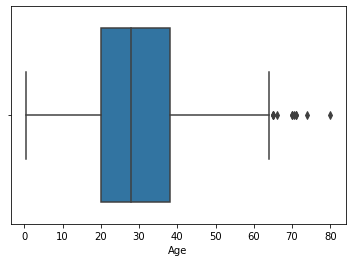

In [24]:
import seaborn as sns 
#On affiche le boxplot associé à la variable
sns.boxplot(data1['Age'])


In [25]:
# Replace missing values with mean
data1['Age'].fillna(data1['Age'].median(), inplace=True)

In [26]:
print(data1.describe())

           Pclass         Age
count  891.000000  891.000000
mean     2.308642   29.361582
std      0.836071   13.019697
min      1.000000    0.420000
25%      2.000000   22.000000
50%      3.000000   28.000000
75%      3.000000   35.000000
max      3.000000   80.000000


In [27]:
#On supprime les valeurs aberrantes
#On calcule Q1
q1=data1["Age"].quantile(q=0.25)
#On calcule Q3
q3=data1["Age"].quantile(q=0.75)
#On calcule l'écart interquartile (IQR)
IQR=q3-q1
#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = q1-1.5*IQR
#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 +1.5*IQR
#On garde les valeurs à l'intérieur de la borne inférieure et supérieure
data1= data1[data1["Age"]<borne_sup]
data1=data1[data1["Age"]>borne_inf]


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

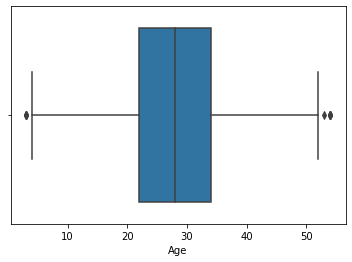

In [28]:
sns.boxplot(data1['Age'])

In [29]:
print(data1.describe())

           Pclass         Age
count  825.000000  825.000000
mean     2.341818   28.515152
std      0.824096   10.177256
min      1.000000    3.000000
25%      2.000000   22.000000
50%      3.000000   28.000000
75%      3.000000   34.000000
max      3.000000   54.000000


In [37]:
cleanup_sex={"Sex":{"male":0, "female":1}}

In [38]:
cleanup_Survived={"Survived":{"No":0, "Yes":1}}

In [39]:
data1.replace(cleanup_sex, inplace=True)

In [40]:
data1.replace(cleanup_Survived, inplace=True)

In [41]:
data1

,Survived,Pclass,Sex,Age
0,0,2,0,28.0
1,0,3,0,25.0
2,0,3,0,20.0
3,0,3,1,29.0
4,0,1,0,31.0
...,...,...,...,...
886,1,2,1,14.0
887,0,3,0,22.0
888,0,3,1,30.0
889,0,3,0,28.0


In [42]:
# Step 6: Saving the cleaned data
data1.to_csv("cleaned_titanic.csv", index=False)